In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seissolxdmf as seisx

In [2]:
plt.rcParams["font.family"] = "serif"
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12)

In [3]:
def compute_slip_with_depth(bins,z,slip,typeId):
    
    # INPUT:
    # - bins : vector defining the depth intervals (positive below the surface)
    # - z : z coordinate of the slip model subfaults
    # - slip : slip on each subfaults
    # - typeId = choose between 'mean', 'cumul' or 'normCumul'
    # to compute respectively the mean slip, cumulative slip, or normalized
    # cumulative slip.
     
    # OUTPUT:
    # - slipZ: mean, cumulative, or normalized cumulative slip computed for each depth interval
    # - meanZ: middle depth of each depth interval (for plotting purpose)
    # - ssd: Amount of Shallow Slip Deficit
    
    slipZ=np.zeros(np.size(bins)-1)
    
    for i in range(np.size(bins)-1):
        # find slip values within each depth bin
        ind = np.where( (z>= bins[i]) & (z < bins[i+1]) ) 
        if np.shape(ind)[0] == 2:
            ind = ind[1]
        elif np.shape(ind)[0] == 1:
            ind = ind[0]
            
        # compute mean or cumulative slip
        if typeId == 'mean':
            slipZ[i] = np.mean(slip[ind])
        elif typeId == 'cumul'  or typeId == 'normCumul':
            slipZ[i] = np.sum(slip[ind])
     
    if typeId == 'normCumul':
         slipZ = slipZ/np.max(slipZ)
            
    # compute SSD    
    ssd = (1 - slipZ[0] / np.max(slipZ))*100
    
    print(f'SSD is {round(ssd,1)} %')
    
    # middle depth of the bins (for plotting purpose)
    meanZ = bins[0:-1] + (bins[1::] - bins[0:-1])/2
    
    return slipZ, meanZ, ssd 

SSD is 0.0 %
[1.         0.91912395 0.76777576 0.84377357 0.84923644 0.84494563
 0.83124737 0.74919575 0.78252312 0.73694247 0.66698511 0.55257342
 0.34175422 0.1440203 ]


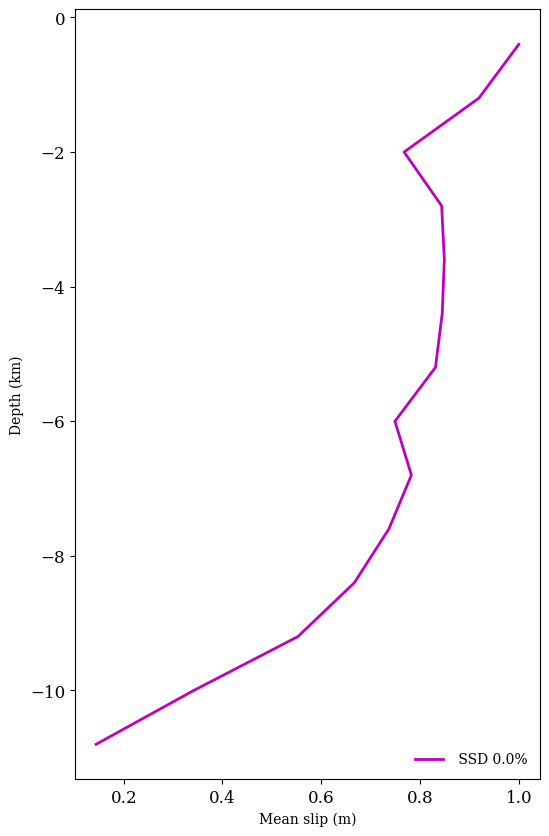

In [4]:
# Load SeisSol output
#xdmfFilename = '/import/freenas-m-05-seissol/kutschera/HIWI/SeisSol/simple_fault_geometry/Simple_West_M7.343/HFFtest-fault.xdmf'
#xdmfFilename = '/import/freenas-m-05-seissol/kutschera/HIWI/SeisSol/simple_fault_geometry/Simple_Middle_M7.333/HFFtest-fault.xdmf'
xdmfFilename = '/import/freenas-m-05-seissol/kutschera/HIWI/SeisSol/simple_fault_geometry/Simple_East_M7.341/HFFtest-fault.xdmf'
sx = seisx.seissolxdmf(xdmfFilename)
ndt = sx.ReadNdt()
xyz = sx.ReadGeometry()
connect = sx.ReadConnect()
bary = (xyz[connect[:,0]] + xyz[connect[:,1]] + xyz[connect[:,2]])/3.
asl = sx.ReadData('ASl',idt=ndt-1)

# Compute slip with depth and SSD
bins = np.arange(0,12000,800) # depth intervals
slipZ, meanZ, ssd = compute_slip_with_depth(bins,-bary[:,2],asl,'normCumul')
print(slipZ)

# Plot cumulative slip with depth
fig1,ax = plt.subplots(ncols=1,nrows=1,figsize=(6,10))
ax.plot(slipZ, - meanZ/1e3, label = f" SSD {round(ssd,1)}%",linewidth=2,color='m')
ax.legend(loc='lower right', frameon=False)
ax.set_xlabel('Mean slip (m)')
ax.set_ylabel('Depth (km)')

#plt.savefig('slip_with_depth.png',dpi=200,bbox_inches="tight")
plt.show()

[    0  1000  2000  3000  4000  5000  6000  7000  8000  9000 10000 11000]
SSD is 0.0 %
SSD is 0.0 %
SSD is 0.0 %


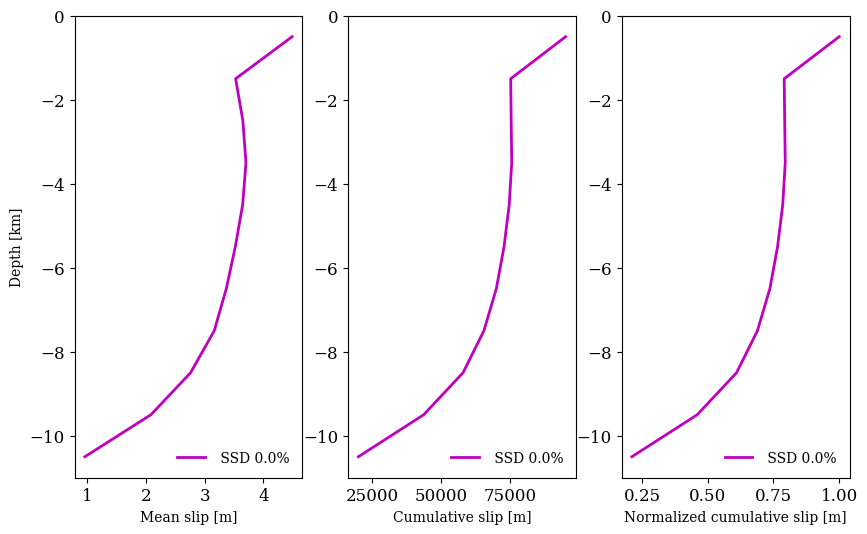

In [5]:
# Load SeisSol output - simple
xdmfFilename = '/import/freenas-m-05-seissol/kutschera/HIWI/SeisSol/simple_fault_geometry/Simple_West_M7.343/HFFtest-fault.xdmf'
#xdmfFilename = '/import/freenas-m-05-seissol/kutschera/HIWI/SeisSol/simple_fault_geometry/Simple_Middle_M7.333/HFFtest-fault.xdmf'
#xdmfFilename = '/import/freenas-m-05-seissol/kutschera/HIWI/SeisSol/simple_fault_geometry/Simple_East_M7.341/HFFtest-fault.xdmf'
sx = seisx.seissolxdmf(xdmfFilename)
ndt = sx.ReadNdt()
xyz = sx.ReadGeometry()
connect = sx.ReadConnect()
bary = (xyz[connect[:,0]] + xyz[connect[:,1]] + xyz[connect[:,2]])/3.
asl = sx.ReadData('ASl',idt=ndt-1)

bins = np.arange(0,12000,1000) # depth intervals
print(bins)
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3,nrows=1,figsize=(10,6))

# Compute slip with depth and SSD
slipZ, meanZ, ssd = compute_slip_with_depth(bins,-bary[:,2],asl,'mean')
# Plot cumulative slip with depth
ax1.plot(slipZ, - meanZ/1e3, label = f" SSD {round(ssd,1)}%",linewidth=2,color='m')
ax1.legend(loc='lower right', frameon=False)
ax1.set_xlabel('Mean slip [m]')
ax1.set_ylabel('Depth [km]')

# Compute slip with depth and SSD
slipZ, meanZ, ssd = compute_slip_with_depth(bins,-bary[:,2],asl,'cumul')
# Plot cumulative slip with depth
ax2.plot(slipZ, - meanZ/1e3, label = f" SSD {round(ssd,1)}%",linewidth=2,color='m')
ax2.legend(loc='lower right', frameon=False)
ax2.set_xlabel('Cumulative slip [m]')

# Compute slip with depth and SSD
slipZ, meanZ, ssd = compute_slip_with_depth(bins,-bary[:,2],asl,'normCumul')
# Plot cumulative slip with depth
ax3.plot(slipZ, - meanZ/1e3, label = f" SSD {round(ssd,1)}%",linewidth=2,color='m')
ax3.legend(loc='lower right', frameon=False)
ax3.set_xlabel('Normalized cumulative slip [m]')

#plt.savefig('slip_with_depth.png',dpi=200,bbox_inches="tight")
plt.show()

[    0  1000  2000  3000  4000  5000  6000  7000  8000  9000 10000 11000]
SSD is 1.9 %
SSD is 10.2 %
SSD is 10.2 %


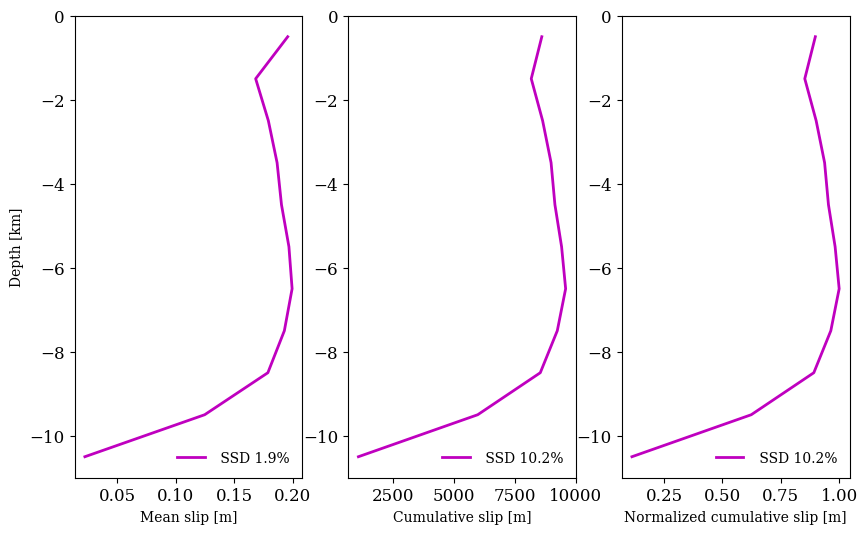

In [6]:
# Load SeisSol output - complex
#xdmfFilename = '/import/freenas-m-05-seissol/kutschera/HIWI/SeisSol/complex_fault_geometry/Complex_West_M6.74/HFFtest-fault.xdmf'
#xdmfFilename = '/import/freenas-m-05-seissol/kutschera/HIWI/SeisSol/complex_fault_geometry/Complex_Middle_M7.07/HFFtest-fault.xdmf'
xdmfFilename = '/import/freenas-m-05-seissol/kutschera/HIWI/SeisSol/complex_fault_geometry/Complex_East_M6.68/HFFtest-fault.xdmf'
sx = seisx.seissolxdmf(xdmfFilename)
ndt = sx.ReadNdt()
xyz = sx.ReadGeometry()
connect = sx.ReadConnect()
bary = (xyz[connect[:,0]] + xyz[connect[:,1]] + xyz[connect[:,2]])/3.
asl = sx.ReadData('ASl',idt=ndt-1)

bins = np.arange(0,12000,1000) # depth intervals
print(bins)
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3,nrows=1,figsize=(10,6))

# Compute slip with depth and SSD
slipZ, meanZ, ssd = compute_slip_with_depth(bins,-bary[:,2],asl,'mean')
# Plot cumulative slip with depth
ax1.plot(slipZ, - meanZ/1e3, label = f" SSD {round(ssd,1)}%",linewidth=2,color='m')
ax1.legend(loc='lower right', frameon=False)
ax1.set_xlabel('Mean slip [m]')
ax1.set_ylabel('Depth [km]')

# Compute slip with depth and SSD
slipZ, meanZ, ssd = compute_slip_with_depth(bins,-bary[:,2],asl,'cumul')
# Plot cumulative slip with depth
ax2.plot(slipZ, - meanZ/1e3, label = f" SSD {round(ssd,1)}%",linewidth=2,color='m')
ax2.legend(loc='lower right', frameon=False)
ax2.set_xlabel('Cumulative slip [m]')

# Compute slip with depth and SSD
slipZ, meanZ, ssd = compute_slip_with_depth(bins,-bary[:,2],asl,'normCumul')
# Plot cumulative slip with depth
ax3.plot(slipZ, - meanZ/1e3, label = f" SSD {round(ssd,1)}%",linewidth=2,color='m')
ax3.legend(loc='lower right', frameon=False)
ax3.set_xlabel('Normalized cumulative slip [m]')


#plt.savefig('slip_with_depth.png',dpi=200,bbox_inches="tight")
plt.show()

[    0  1000  2000  3000  4000  5000  6000  7000  8000  9000 10000 11000
 12000]
SSD is 1.9 %
SSD is 10.2 %
SSD is 11.7 %
SSD is 19.1 %
SSD is 23.7 %
SSD is 30.0 %


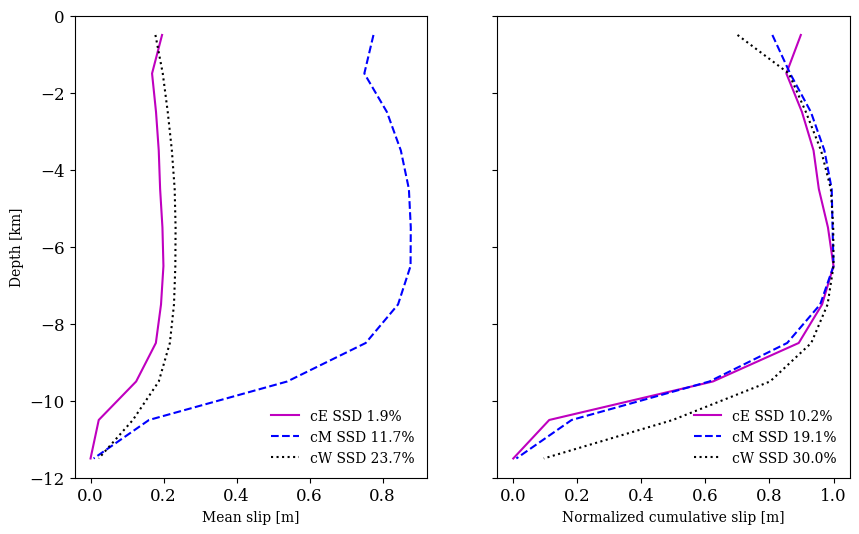

In [7]:
# Load SeisSol output - complex

bins = np.arange(0,13000,1000) # depth intervals
print(bins)
fig, (ax1, ax2) = plt.subplots(ncols=2,nrows=1,figsize=(10,6), sharey=True)

#xdmfFilename = '/import/freenas-m-05-seissol/kutschera/HIWI/SeisSol/complex_fault_geometry/Complex_West_M6.74/HFFtest-fault.xdmf'
#xdmfFilename = '/import/freenas-m-05-seissol/kutschera/HIWI/SeisSol/complex_fault_geometry/Complex_Middle_M7.07/HFFtest-fault.xdmf'
xdmfFilename = '/import/freenas-m-05-seissol/kutschera/HIWI/SeisSol/complex_fault_geometry/Complex_East_M6.68/HFFtest-fault.xdmf'
sx = seisx.seissolxdmf(xdmfFilename)
ndt = sx.ReadNdt()
xyz = sx.ReadGeometry()
connect = sx.ReadConnect()
bary = (xyz[connect[:,0]] + xyz[connect[:,1]] + xyz[connect[:,2]])/3.
asl = sx.ReadData('ASl',idt=ndt-1)

# Compute slip with depth and SSD
slipZ, meanZ, ssd = compute_slip_with_depth(bins,-bary[:,2],asl,'mean')
# Plot cumulative slip with depth
ax1.plot(slipZ, - meanZ/1e3, label = "cE SSD {}%".format(round(ssd,1)), color='m', linestyle="solid")
ax1.legend(loc='lower right', frameon=False)
ax1.set_xlabel('Mean slip [m]')
ax1.set_ylabel('Depth [km]')

# Compute slip with depth and SSD
slipZ, meanZ, ssd = compute_slip_with_depth(bins,-bary[:,2],asl,'normCumul')
# Plot cumulative slip with depth
ax2.plot(slipZ, - meanZ/1e3, label = "cE SSD {}%".format(round(ssd,1)), color='m', linestyle="solid")
ax2.legend(loc='lower right', frameon=False)
ax2.set_xlabel('Normalized cumulative slip [m]')


#####
xdmfFilename = '/import/freenas-m-05-seissol/kutschera/HIWI/SeisSol/complex_fault_geometry/Complex_Middle_M7.07/HFFtest-fault.xdmf'
sx = seisx.seissolxdmf(xdmfFilename)
ndt = sx.ReadNdt()
xyz = sx.ReadGeometry()
connect = sx.ReadConnect()
bary = (xyz[connect[:,0]] + xyz[connect[:,1]] + xyz[connect[:,2]])/3.
asl = sx.ReadData('ASl',idt=ndt-1)

# Compute slip with depth and SSD
slipZ, meanZ, ssd = compute_slip_with_depth(bins,-bary[:,2],asl,'mean')
# Plot cumulative slip with depth
ax1.plot(slipZ, - meanZ/1e3, label = "cM SSD {}%".format(round(ssd,1)), color='b', linestyle="dashed")
ax1.legend(loc='lower right', frameon=False)
ax1.set_xlabel('Mean slip [m]')
ax1.set_ylabel('Depth [km]')

# Compute slip with depth and SSD
slipZ, meanZ, ssd = compute_slip_with_depth(bins,-bary[:,2],asl,'normCumul')
# Plot cumulative slip with depth
ax2.plot(slipZ, - meanZ/1e3, label = "cM SSD {}%".format(round(ssd,1)), color='b', linestyle="dashed")
ax2.legend(loc='lower right', frameon=False)
ax2.set_xlabel('Normalized cumulative slip [m]')


#####
xdmfFilename = '/import/freenas-m-05-seissol/kutschera/HIWI/SeisSol/complex_fault_geometry/Complex_West_M6.74/HFFtest-fault.xdmf'
sx = seisx.seissolxdmf(xdmfFilename)
ndt = sx.ReadNdt()
xyz = sx.ReadGeometry()
connect = sx.ReadConnect()
bary = (xyz[connect[:,0]] + xyz[connect[:,1]] + xyz[connect[:,2]])/3.
asl = sx.ReadData('ASl',idt=ndt-1)

# Compute slip with depth and SSD
slipZ, meanZ, ssd = compute_slip_with_depth(bins,-bary[:,2],asl,'mean')
# Plot cumulative slip with depth
ax1.plot(slipZ, - meanZ/1e3, label = "cW SSD {}%".format(round(ssd,1)), color='k', linestyle="dotted")
ax1.legend(loc='lower right', frameon=False)
ax1.set_xlabel('Mean slip [m]')
ax1.set_ylabel('Depth [km]')

# Compute slip with depth and SSD
slipZ, meanZ, ssd = compute_slip_with_depth(bins,-bary[:,2],asl,'normCumul')
# Plot cumulative slip with depth
ax2.plot(slipZ, - meanZ/1e3, label = "cW SSD {}%".format(round(ssd,1)), color='k', linestyle="dotted")
ax2.legend(loc='lower right', frameon=False)
ax2.set_xlabel('Normalized cumulative slip [m]')

ax1.set_ylim(-12,0)

#plt.savefig('slip_with_depth.png',dpi=200,bbox_inches="tight")
plt.show()

[    0   750  1500  2250  3000  3750  4500  5250  6000  6750  7500  8250
  9000  9750 10500 11250 12000 12750]
SSD is 0.0 %
SSD is 0.0 %
SSD is 0.0 %
SSD is 36.3 %
SSD is 21.1 %
SSD is 10.5 %


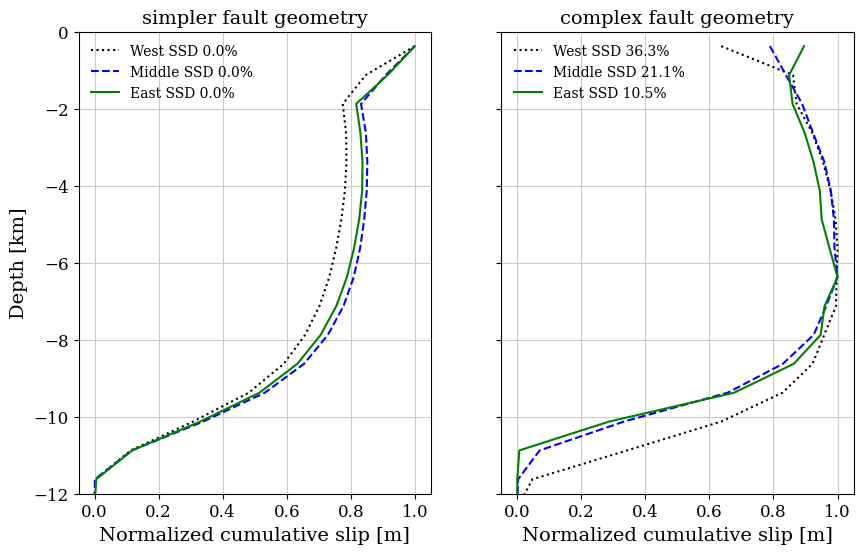

In [8]:
# Load SeisSol output - normCumul

bins = np.arange(0,13000,750) # depth intervals
print(bins)
fig, (ax1, ax2) = plt.subplots(ncols=2,nrows=1,figsize=(10,6), sharey=True)


## SIMPLE WEST
xdmfFilename = '/import/freenas-m-05-seissol/kutschera/HIWI/SeisSol/simple_fault_geometry/Simple_West_M7.343/HFFtest-fault.xdmf'
sx = seisx.seissolxdmf(xdmfFilename)
ndt = sx.ReadNdt()
xyz = sx.ReadGeometry()
connect = sx.ReadConnect()
bary = (xyz[connect[:,0]] + xyz[connect[:,1]] + xyz[connect[:,2]])/3.
asl = sx.ReadData('ASl',idt=ndt-1)
# Compute slip with depth and SSD
slipZ, meanZ, ssd = compute_slip_with_depth(bins,-bary[:,2],asl,'normCumul')
# Plot cumulative slip with depth
ax1.plot(slipZ, - meanZ/1e3, label = "West SSD {}%".format(round(ssd,1)), color='k', linestyle="dotted")

## SIMPLE MIDDLE
xdmfFilename = '/import/freenas-m-05-seissol/kutschera/HIWI/SeisSol/simple_fault_geometry/Simple_Middle_M7.333/HFFtest-fault.xdmf'
sx = seisx.seissolxdmf(xdmfFilename)
ndt = sx.ReadNdt()
xyz = sx.ReadGeometry()
connect = sx.ReadConnect()
bary = (xyz[connect[:,0]] + xyz[connect[:,1]] + xyz[connect[:,2]])/3.
asl = sx.ReadData('ASl',idt=ndt-1)
# Compute slip with depth and SSD
slipZ, meanZ, ssd = compute_slip_with_depth(bins,-bary[:,2],asl,'normCumul')
# Plot cumulative slip with depth
ax1.plot(slipZ, - meanZ/1e3, label = "Middle SSD {}%".format(round(ssd,1)), color='b', linestyle="dashed")

## SIMPLE EAST
xdmfFilename = '/import/freenas-m-05-seissol/kutschera/HIWI/SeisSol/simple_fault_geometry/Simple_East_M7.341/HFFtest-fault.xdmf'
sx = seisx.seissolxdmf(xdmfFilename)
ndt = sx.ReadNdt()
xyz = sx.ReadGeometry()
connect = sx.ReadConnect()
bary = (xyz[connect[:,0]] + xyz[connect[:,1]] + xyz[connect[:,2]])/3.
asl = sx.ReadData('ASl',idt=ndt-1)
# Compute slip with depth and SSD
slipZ, meanZ, ssd = compute_slip_with_depth(bins,-bary[:,2],asl,'normCumul')
# Plot cumulative slip with depth
ax1.plot(slipZ, - meanZ/1e3, label = "East SSD {}%".format(round(ssd,1)), color='g', linestyle="solid")



## COMPLEX WEST
xdmfFilename = '/import/freenas-m-05-seissol/kutschera/HIWI/SeisSol/complex_fault_geometry/Complex_West_M6.74/HFFtest-fault.xdmf'
sx = seisx.seissolxdmf(xdmfFilename)
ndt = sx.ReadNdt()
xyz = sx.ReadGeometry()
connect = sx.ReadConnect()
bary = (xyz[connect[:,0]] + xyz[connect[:,1]] + xyz[connect[:,2]])/3.
asl = sx.ReadData('ASl',idt=ndt-1)
# Compute slip with depth and SSD
slipZ, meanZ, ssd = compute_slip_with_depth(bins,-bary[:,2],asl,'normCumul')
# Plot cumulative slip with depth
ax2.plot(slipZ, - meanZ/1e3, label = "West SSD {}%".format(round(ssd,1)), color='k', linestyle="dotted")

## COMPLEX MIDDLE
xdmfFilename = '/import/freenas-m-05-seissol/kutschera/HIWI/SeisSol/complex_fault_geometry/Complex_Middle_M7.07/HFFtest-fault.xdmf'
sx = seisx.seissolxdmf(xdmfFilename)
ndt = sx.ReadNdt()
xyz = sx.ReadGeometry()
connect = sx.ReadConnect()
bary = (xyz[connect[:,0]] + xyz[connect[:,1]] + xyz[connect[:,2]])/3.
asl = sx.ReadData('ASl',idt=ndt-1)
# Compute slip with depth and SSD
slipZ, meanZ, ssd = compute_slip_with_depth(bins,-bary[:,2],asl,'normCumul')
# Plot cumulative slip with depth
ax2.plot(slipZ, - meanZ/1e3, label = "Middle SSD {}%".format(round(ssd,1)), color='b', linestyle="dashed")

## COMPLEX EAST
xdmfFilename = '/import/freenas-m-05-seissol/kutschera/HIWI/SeisSol/complex_fault_geometry/Complex_East_M6.68/HFFtest-fault.xdmf'
sx = seisx.seissolxdmf(xdmfFilename)
ndt = sx.ReadNdt()
xyz = sx.ReadGeometry()
connect = sx.ReadConnect()
bary = (xyz[connect[:,0]] + xyz[connect[:,1]] + xyz[connect[:,2]])/3.
asl = sx.ReadData('ASl',idt=ndt-1)
# Compute slip with depth and SSD
slipZ, meanZ, ssd = compute_slip_with_depth(bins,-bary[:,2],asl,'normCumul')
# Plot cumulative slip with depth
ax2.plot(slipZ, - meanZ/1e3, label = "East SSD {}%".format(round(ssd,1)), color='g', linestyle="solid")



ax1.legend(loc='upper left', frameon=False)
ax2.legend(loc='upper left', frameon=False)
ax1.set_ylabel('Depth [km]', fontsize=14)
ax1.set_xlabel('Normalized cumulative slip [m]', fontsize=14)
ax2.set_xlabel('Normalized cumulative slip [m]', fontsize=14)
ax1.set_ylim(-12,0)
ax1.set_title("simpler fault geometry", fontsize=14)
ax2.set_title("complex fault geometry", fontsize=14)
ax1.grid(c="0.8")
ax2.grid(c="0.8")

plt.savefig("output/SSD_HFFZ.png", dpi=300, bbox_inches="tight")
plt.show()

[    0   750  1500  2250  3000  3750  4500  5250  6000  6750  7500  8250
  9000  9750 10500 11250 12000 12750]
SSD is 0.0 %
SSD is 0.0 %
SSD is 0.0 %
SSD is 0.0 %
SSD is 9.5 %
SSD is 27.4 %


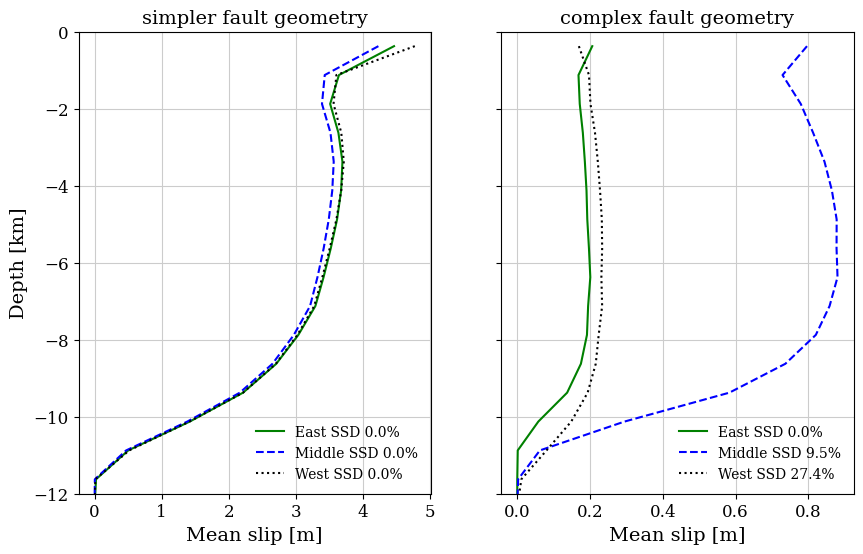

In [9]:
# Load SeisSol output - mean

bins = np.arange(0,13000,750) # depth intervals
print(bins)
fig, (ax1, ax2) = plt.subplots(ncols=2,nrows=1,figsize=(10,6), sharey=True)

## SIMPLE EAST
xdmfFilename = '/import/freenas-m-05-seissol/kutschera/HIWI/SeisSol/simple_fault_geometry/Simple_East_M7.341/HFFtest-fault.xdmf'
sx = seisx.seissolxdmf(xdmfFilename)
ndt = sx.ReadNdt()
xyz = sx.ReadGeometry()
connect = sx.ReadConnect()
bary = (xyz[connect[:,0]] + xyz[connect[:,1]] + xyz[connect[:,2]])/3.
asl = sx.ReadData('ASl',idt=ndt-1)

# Compute slip with depth and SSD
slipZ, meanZ, ssd = compute_slip_with_depth(bins,-bary[:,2],asl,'mean')
# Plot cumulative slip with depth
ax1.plot(slipZ, - meanZ/1e3, label = "East SSD {}%".format(round(ssd,1)), color='g', linestyle="solid")


## SIMPLE MIDDLE
xdmfFilename = '/import/freenas-m-05-seissol/kutschera/HIWI/SeisSol/simple_fault_geometry/Simple_Middle_M7.333/HFFtest-fault.xdmf'
sx = seisx.seissolxdmf(xdmfFilename)
ndt = sx.ReadNdt()
xyz = sx.ReadGeometry()
connect = sx.ReadConnect()
bary = (xyz[connect[:,0]] + xyz[connect[:,1]] + xyz[connect[:,2]])/3.
asl = sx.ReadData('ASl',idt=ndt-1)

# Compute slip with depth and SSD
slipZ, meanZ, ssd = compute_slip_with_depth(bins,-bary[:,2],asl,'mean')
# Plot cumulative slip with depth
ax1.plot(slipZ, - meanZ/1e3, label = "Middle SSD {}%".format(round(ssd,1)), color='b', linestyle="dashed")


## SIMPLE WEST
xdmfFilename = '/import/freenas-m-05-seissol/kutschera/HIWI/SeisSol/simple_fault_geometry/Simple_West_M7.343/HFFtest-fault.xdmf'
sx = seisx.seissolxdmf(xdmfFilename)
ndt = sx.ReadNdt()
xyz = sx.ReadGeometry()
connect = sx.ReadConnect()
bary = (xyz[connect[:,0]] + xyz[connect[:,1]] + xyz[connect[:,2]])/3.
asl = sx.ReadData('ASl',idt=ndt-1)

# Compute slip with depth and SSD
slipZ, meanZ, ssd = compute_slip_with_depth(bins,-bary[:,2],asl,'mean')
# Plot cumulative slip with depth
ax1.plot(slipZ, - meanZ/1e3, label = "West SSD {}%".format(round(ssd,1)), color='k', linestyle="dotted")


## COMPLEX EAST
xdmfFilename = '/import/freenas-m-05-seissol/kutschera/HIWI/SeisSol/complex_fault_geometry/Complex_East_M6.68/HFFtest-fault.xdmf'
sx = seisx.seissolxdmf(xdmfFilename)
ndt = sx.ReadNdt()
xyz = sx.ReadGeometry()
connect = sx.ReadConnect()
bary = (xyz[connect[:,0]] + xyz[connect[:,1]] + xyz[connect[:,2]])/3.
asl = sx.ReadData('ASl',idt=ndt-1)

# Compute slip with depth and SSD
slipZ, meanZ, ssd = compute_slip_with_depth(bins,-bary[:,2],asl,'mean')
# Plot cumulative slip with depth
ax2.plot(slipZ, - meanZ/1e3, label = "East SSD {}%".format(round(ssd,1)), color='g', linestyle="solid")


## COMPLEX MIDDLE
xdmfFilename = '/import/freenas-m-05-seissol/kutschera/HIWI/SeisSol/complex_fault_geometry/Complex_Middle_M7.07/HFFtest-fault.xdmf'
sx = seisx.seissolxdmf(xdmfFilename)
ndt = sx.ReadNdt()
xyz = sx.ReadGeometry()
connect = sx.ReadConnect()
bary = (xyz[connect[:,0]] + xyz[connect[:,1]] + xyz[connect[:,2]])/3.
asl = sx.ReadData('ASl',idt=ndt-1)

# Compute slip with depth and SSD
slipZ, meanZ, ssd = compute_slip_with_depth(bins,-bary[:,2],asl,'mean')
# Plot cumulative slip with depth
ax2.plot(slipZ, - meanZ/1e3, label = "Middle SSD {}%".format(round(ssd,1)), color='b', linestyle="dashed")

## COMPLEX WEST
xdmfFilename = '/import/freenas-m-05-seissol/kutschera/HIWI/SeisSol/complex_fault_geometry/Complex_West_M6.74/HFFtest-fault.xdmf'
sx = seisx.seissolxdmf(xdmfFilename)
ndt = sx.ReadNdt()
xyz = sx.ReadGeometry()
connect = sx.ReadConnect()
bary = (xyz[connect[:,0]] + xyz[connect[:,1]] + xyz[connect[:,2]])/3.
asl = sx.ReadData('ASl',idt=ndt-1)

# Compute slip with depth and SSD
slipZ, meanZ, ssd = compute_slip_with_depth(bins,-bary[:,2],asl,'mean')
# Plot cumulative slip with depth
ax2.plot(slipZ, - meanZ/1e3, label = "West SSD {}%".format(round(ssd,1)), color='k', linestyle="dotted")

ax1.legend(loc='lower right', frameon=False)
ax2.legend(loc='lower right', frameon=False)
ax1.set_ylabel('Depth [km]', fontsize=14)
ax1.set_xlabel('Mean slip [m]', fontsize=14)
ax2.set_xlabel('Mean slip [m]', fontsize=14)
ax1.set_ylim(-12,0)
ax1.set_title("simpler fault geometry", fontsize=14)
ax2.set_title("complex fault geometry", fontsize=14)
ax1.grid(c="0.8")
ax2.grid(c="0.8")

#plt.savefig('slip_with_depth.png',dpi=200,bbox_inches="tight")
plt.show()